<a target="_blank" href="https://colab.research.google.com/github/cerr/pyCERR-Notebooks/blob/main/batch_extract_radiomics_lung_ct.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Extract radiomics features from a batch of dicom datasets

The example below demonstrates extraction of radiomics features from CT scan and tumor segmentation for a batch of DICOM datasets.

#### Dataset description

**Citation:**  Bakr, S., Gevaert, O., Echegaray, S., Ayers, K., Zhou, M., Shafiq, M., Zheng, H., Zhang, W., Leung, A., Kadoch, M., Shrager, J., Quon, A., Rubin, D., Plevritis, S., & Napel, S. (2017). Data for NSCLC Radiogenomics (Version 4) [Data set]. The Cancer Imaging Archive. https://doi.org/10.7937/K9/TCIA.2017.7hs46erv <br>
https://www.cancerimagingarchive.net/collection/nsclc-radiogenomics/

#### Dataset download

In [1]:
lungDcmPath = '/content/lung_dicom_5pts'
dataTarPath = '/content/lung_data_5pt.gz'
settingsTarPath = '/content/settings.gz'

In [2]:
! wget -O {dataTarPath} https://mskcc.box.com/shared/static/cpngvd2kn6ff97laz5amkax7e60iz05z.gz
! tar xf {dataTarPath}
! rm {dataTarPath}
! wget -O {settingsTarPath} https://mskcc.box.com/shared/static/ho5rhgvjx0x9c178g0es336ie7nfnkdm.gz
! tar xf {settingsTarPath}
! rm {settingsTarPath}

--2024-05-15 20:59:56--  https://mskcc.box.com/shared/static/cpngvd2kn6ff97laz5amkax7e60iz05z.gz
Resolving mskcc.box.com (mskcc.box.com)... 74.112.186.144
Connecting to mskcc.box.com (mskcc.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/cpngvd2kn6ff97laz5amkax7e60iz05z.gz [following]
--2024-05-15 20:59:57--  https://mskcc.box.com/public/static/cpngvd2kn6ff97laz5amkax7e60iz05z.gz
Reusing existing connection to mskcc.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mskcc.ent.box.com/public/static/cpngvd2kn6ff97laz5amkax7e60iz05z.gz [following]
--2024-05-15 20:59:58--  https://mskcc.ent.box.com/public/static/cpngvd2kn6ff97laz5amkax7e60iz05z.gz
Resolving mskcc.ent.box.com (mskcc.ent.box.com)... 74.112.186.144
Connecting to mskcc.ent.box.com (mskcc.ent.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://publ

### Install pyCERR

In [3]:
%%capture
!pip install "pyCERR[napari] @ git+https://github.com/cerr/pyCERR"

#### Get a list of patient directories

In [4]:
from cerr import datasets
import os

all_pat_dirs = []
for d in os.scandir(lungDcmPath):
    all_pat_dirs.append(d.path)


#### Define location of settings file

In [5]:
settingsFile = '/content/settings/original_settings.json'

#### Define location of output csv file

In [6]:
import os
csvFileName = r"/content/feats_from_CT.csv"
if os.path.exists(csvFileName): os.remove(csvFileName)

### Loop over dicom directories and extract features

The example datasets contain only one scan and one segmentation. Hence, `scanNum = 0` and `structNum = 0` is used in this example. In case of multiple scans and segmentations, users should find their appropriate indices as an input to `ibsi1.computeScalarFeatures`

In [7]:
import os
from cerr import plan_container as pc
from cerr.radiomics import ibsi1

featList = []
idDict = {}
writeHeader = True
for pt_dir in all_pat_dirs[:5]:
    _, id = os.path.split(pt_dir)
    print("Data dir :" + id)
    planC = pc.loadDcmDir(pt_dir)
    scanNum = 0
    structNum = 0
    featDict, _ = ibsi1.computeScalarFeatures(scanNum, structNum, settingsFile, planC)
    idDict['id'] = id
    featDict = {**idDict, **featDict}
    featList.append(featDict)
    ibsi1.writeFeaturesToFile(featDict, csvFileName, writeHeader)
    writeHeader = False


Data dir :R01-005
('R01-005', 'R01-005', '1.3.6.1.4.1.14519.5.2.1.4334.1501.113158555687236175132242672793', '1.3.6.1.4.1.14519.5.2.1.4334.1501.129471994294769908788611961140', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT')
('R01-005', 'R01-005', '1.3.6.1.4.1.14519.5.2.1.4334.1501.113158555687236175132242672793', '1.3.6.1.4.1.14519.5.2.1.4334.1501.283986500853496927475323820355', 'SEG', 'SEG', 'SEG', 'SEG', 'SEG', 'SEG', 'SEG')
Data dir :R01-003
('R01-003', 'R01-003', '1.3.6.1.4.1.14519.5.2.1.4334.1501.257952866936113224285617502622', '1.3.6.1.4.1.14519.5.2.1.4334.1501.279603550042132934347380996510', 'SEG', 'SEG', 'SEG', 'SEG', 'SEG', 'SEG', 'SEG')
('R01-003', 'R01-003', '1.3.6.1.4.1.14519.5.2.1.4334.1501.257952866936113224285617502622', '1.3.6.1.4.1.14519.5.2.1.4334.1501.668993209202739148457939869868', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT')
Data dir :R01-001
('R01-001', 'R01-001', '1.3.6.1.4.1.14519.5.2.1.4334.1501.116796918629271881210561198785', '1.3.6.1.4.1.14519.5.2.1.4334.1501.20

#### Explore features

In [8]:
import pandas as pd
df = pd.read_csv(csvFileName)
featNames = [col for col in df.columns]
df.head()


,id,numVoxelsOrig,numVoxelsInterpReseg,meanIntensityInterpReseg,maxIntensityInterpReseg,minIntensityInterpReseg,original_shape_majorAxis,original_shape_minorAxis,original_shape_leastAxis,original_shape_flatness,...,original_gldm_dependenceCountPercentage_3D,original_gldm_grayLevelVariance_3D,original_gldm_dependenceCountVariance_3D,original_gldm_dependenceCountEntropy_3D,original_gldm_dependenceCountEnergy_3D,original_gtdm_coarseness_3D,original_gtdm_contrast_3D,original_gtdm_busyness_3D,original_gtdm_complexity_3D,original_gtdm_strength_3D
0,R01-005,16625,7108,-31.117706,212.926440,-699.349390,27.321249,21.401942,18.392412,0.673191,...,1.0,499.576868,1.785890,7.305298,0.008825,0.000845,0.274312,0.024403,106196.752585,22.789525
1,R01-003,1324,1459,-66.143278,230.643111,-674.686667,16.650723,12.124708,11.145240,0.669355,...,1.0,1081.034124,1.353357,7.597390,0.006417,0.004171,1.068356,0.006386,159633.767536,55.749463
2,R01-001,2719,1309,-147.231132,112.066951,-780.036798,18.472807,12.869057,9.008400,0.487657,...,1.0,1479.707459,1.260812,7.750514,0.005520,0.004869,1.631478,0.006472,166944.687203,69.156329
3,R01-004,1547,1343,-97.007832,240.430064,-820.978987,21.791912,13.435795,8.309209,0.381298,...,1.0,2158.032909,0.759834,7.857330,0.005296,0.005126,2.116510,0.004584,283918.237398,101.719826
4,R01-002,2150,2144,-119.776807,98.282297,-757.420271,18.921967,13.630866,12.390248,0.654808,...,1.0,1102.854881,1.733138,7.565632,0.006537,0.002784,1.094090,0.010267,132051.090158,44.151479


In [9]:
print(featNames)

['id', 'numVoxelsOrig', 'numVoxelsInterpReseg', 'meanIntensityInterpReseg', 'maxIntensityInterpReseg', 'minIntensityInterpReseg', 'original_shape_majorAxis', 'original_shape_minorAxis', 'original_shape_leastAxis', 'original_shape_flatness', 'original_shape_elongation', 'original_shape_max2dDiameterAxialPlane', 'original_shape_max2dDiameterSagittalPlane', 'original_shape_max2dDiameterCoronalPlane', 'original_shape_surfArea', 'original_shape_max3dDiameter', 'original_shape_volume', 'original_shape_filledVolume', 'original_shape_volumeDensityAABB', 'original_shape_Compactness1', 'original_shape_Compactness2', 'original_shape_spherDisprop', 'original_shape_sphericity', 'original_shape_surfToVolRatio', 'original_firstOrder_min', 'original_firstOrder_max', 'original_firstOrder_mean', 'original_firstOrder_range', 'original_firstOrder_std', 'original_firstOrder_var', 'original_firstOrder_median', 'original_firstOrder_skewness', 'original_firstOrder_kurtosis', 'original_firstOrder_entropy', 'or

In [10]:
!pip install seaborn

<Axes: xlabel='id', ylabel='original_shape_volume'>

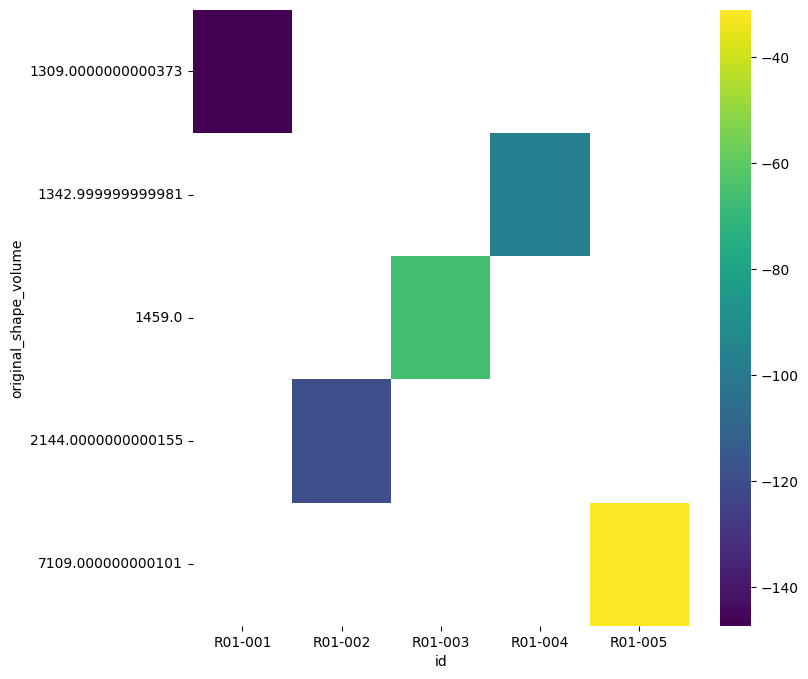

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
meanVals = df.pivot(index="original_shape_volume", columns="id", values="original_firstOrder_mean")
sns.heatmap(meanVals, cmap='viridis')

#### Combine features with outcomes

In [12]:
outcomesPath = '/content/outcomes.xlsx'
! wget -O {outcomesPath} https://mskcc.box.com/shared/static/ldj264f78lo3xfoc4jeuum4vgg2gds37.xlsx

--2024-05-15 21:03:22--  https://mskcc.box.com/shared/static/ldj264f78lo3xfoc4jeuum4vgg2gds37.xlsx
Resolving mskcc.box.com (mskcc.box.com)... 74.112.186.144
Connecting to mskcc.box.com (mskcc.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/ldj264f78lo3xfoc4jeuum4vgg2gds37.xlsx [following]
--2024-05-15 21:03:22--  https://mskcc.box.com/public/static/ldj264f78lo3xfoc4jeuum4vgg2gds37.xlsx
Reusing existing connection to mskcc.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mskcc.ent.box.com/public/static/ldj264f78lo3xfoc4jeuum4vgg2gds37.xlsx [following]
--2024-05-15 21:03:23--  https://mskcc.ent.box.com/public/static/ldj264f78lo3xfoc4jeuum4vgg2gds37.xlsx
Resolving mskcc.ent.box.com (mskcc.ent.box.com)... 74.112.186.144
Connecting to mskcc.ent.box.com (mskcc.ent.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: ht

In [13]:
df_out = pd.read_excel(outcomesPath, index_col=0)
df_out.columns
df_out[['Survival', 'Time to Death (days)']]

,Survival,Time to Death (days)
Case ID,,
AMC-001,1,872.0
AMC-002,0,NaN
AMC-003,0,NaN
AMC-004,0,NaN
AMC-005,0,NaN
...,...,...
R01-159,0,NaN
R01-160,0,NaN
R01-161,0,NaN


In [14]:
df_feats_and_outcm = df.merge(df_out, left_on='id', right_on='Case ID')
df_feats_and_outcm.head()

,id,numVoxelsOrig,numVoxelsInterpReseg,meanIntensityInterpReseg,maxIntensityInterpReseg,minIntensityInterpReseg,original_shape_majorAxis,original_shape_minorAxis,original_shape_leastAxis,original_shape_flatness,...,Date of Recurrence,Date of Last Known Alive,Survival Status,Survival,Date of Death,Time to Death (days),Survival time,CT Date,Days between CT and surgery,PET Date
0,R01-005,16625,7108,-31.117706,212.926440,-699.349390,27.321249,21.401942,18.392412,0.673191,...,1993-01-19,1995-06-03,Dead,1,1995-06-03,1456.0,1456,1991-03-08,92,1991-04-19 00:00:00
1,R01-003,1324,1459,-66.143278,230.643111,-674.686667,16.650723,12.124708,11.145240,0.669355,...,NaT,1993-10-06,Alive,0,NaT,NaN,641,1991-12-10,25,1991-12-19 00:00:00
2,R01-001,2719,1309,-147.231132,112.066951,-780.036798,18.472807,12.869057,9.008400,0.487657,...,NaT,1999-02-09,Alive,0,NaT,NaN,3036,1990-09-06,42,1990-10-17 00:00:00
3,R01-004,1547,1343,-97.007832,240.430064,-820.978987,21.791912,13.435795,8.309209,0.381298,...,1993-09-29,1994-11-24,Alive,0,NaT,NaN,1083,1991-09-09,89,1991-10-17 00:00:00
4,R01-002,2150,2144,-119.776807,98.282297,-757.420271,18.921967,13.630866,12.390248,0.654808,...,NaT,1990-11-29,Alive,0,NaT,NaN,47,1990-09-20,23,1990-10-11 00:00:00
